# Refugee resettlement in the USA `13 points`

Source: https://www.refugeeresettlementdata.com/data.html

As described in [Data Is Plural](https://www.data-is-plural.com/archive/2021-07-14-edition/)

> Axel Dreher et al. have published person-level data on 2.5+ million refugees who arrived in the US between 1975 and 2008. The anonymized records, obtained from the National Archives and originally collected by the Office of Refugee Resettlement, indicate each refugee’s country and date of birth, marital and family status, education level and English proficiency, date of US arrival, US city of resettlement, and more. The researchers also combined these records with public reports from the Bureau of Population, Refugees, and Migration (DIP 2015.11.25) to create a geocoded dataset of annual resettlements by citizenship and destination city from 1975 to 2018.

### Topis covered

* Aggregating
* Filtering
* Unfriendly complexity in data
* Exploratory visualization
* FIPS codes
* Mapping

# Basic analysis `4 points`

### Read in your data

We'll be using the geocoded file, which comes as a `dta` file. A `.dta` file is technically an export from [STATA](https://www.stata.com/), which means you use `pd.read_stata` to bring it in – but otherwise it's the same as a CSV.

In [15]:
import pandas as pd
import numpy as np

df1 = pd.read_stata('orr_prm_1975_2018_v1.dta')

In [227]:
df1.head()

,city_id,city_nat_id,city_nat_year_id,year,citizenship_stable,refugees,city,city_code,county_fips,state_fips,fips,county10name,countyfp10,statefp10,geo_level,longitude,latitude,id_merging
0,1.00,1.00,1.00,1983,afghanistan,17.00,Honolulu,"17,000.00",003,15,15003,Honolulu,003,15,city,-157.86,21.30,1.00
1,1.00,1.00,2.00,1984,afghanistan,11.00,Honolulu,"17,000.00",003,15,15003,Honolulu,003,15,city,-157.86,21.30,2.00
2,1.00,1.00,3.00,1987,afghanistan,2.00,Honolulu,"17,000.00",003,15,15003,Honolulu,003,15,city,-157.86,21.30,3.00
3,1.00,1.00,4.00,1988,afghanistan,1.00,Honolulu,"17,000.00",003,15,15003,Honolulu,003,15,city,-157.86,21.30,4.00
4,1.00,2.00,5.00,1983,bulgaria,1.00,Honolulu,"17,000.00",003,15,15003,Honolulu,003,15,city,-157.86,21.30,5.00


### What years does this dataset include?

In [17]:
df1.year.unique()

array([1983, 1984, 1987, 1988, 1999, 2001, 2003, 2004, 2005, 2008, 1975,
       1979, 1980, 1981, 1982, 1985, 1989, 2002, 1986, 1993, 1977, 1978,
       1991, 1992, 1996, 1990, 1994, 1995, 1997, 1998, 2000, 2006, 2007,
       2015, 2013, 2014, 1976, 2009, 2011, 2016, 2010, 2012, 2017, 2018],
      dtype=int16)

### According to this dataset, what are the top 5 countries for refugees resettled into the United States?

In [41]:
citizenship = df1.citizenship_stable.unique()

rows = []

for c in citizenship:
    row = {}
    row['Country'] = c
    row['Number_of_refugees'] = df1[df1['citizenship_stable'] == c].refugees.sum()
    rows.append(row)

df2 = pd.DataFrame(rows)
df2 = df2.astype({'Number_of_refugees': int})

In [42]:
df2.sort_values('Number_of_refugees', ascending = False).head()

,Country,Number_of_refugees
14,vietnam,816540
13,ussr,506997
9,laos,244136
15,iraq,177425
31,yugoslavia,167711


In [82]:
#Alternative solution --> much quicker, but realized it a bit to late. 
df1.groupby('citizenship_stable').refugees.sum().sort_values(ascending = False).head()

citizenship_stable
vietnam      816,540.00
ussr         506,997.00
laos         244,136.00
iraq         177,425.00
yugoslavia   167,711.00
Name: refugees, dtype: float32

### Why can't I use `.value_counts()` to tell me how many refugees came from each country?

Every row in the dataframe represents a group of refugees, not a single refugee. 
.value_counts() would only count the number of groups.

### What are the top 5 cities for resettling refugees?

In [45]:
cities = df1.city.unique()

rows = []

for c in cities:
    row = {}
    row['City'] = c
    row['Number_of_refugees'] = df1[df1['city'] == c].refugees.sum()
    rows.append(row)

df3 = pd.DataFrame(rows)
df3 = df3.astype({'Number_of_refugees': int})

df3.sort_values('Number_of_refugees', ascending = False).head()

,City,Number_of_refugees
3386,Brooklyn,94611
423,Los Angeles,87116
1934,Houston,72119
767,Chicago,67413
1381,San Diego,58238


In [84]:
#Alternative solution --> much quicker, but realized it a bit to late. 
df1.groupby('city').refugees.sum().sort_values(ascending = False).head()

city
Brooklyn      94,611.00
Los Angeles   87,116.00
Houston       72,119.00
Chicago       67,413.00
San Diego     58,238.00
Name: refugees, dtype: float32

### Surprise, you got tricked! You can't just use `city` to answer that question. Why?

It will help if you try to look at all of the rows for the city of Brooklyn.

In [268]:
df1[df1['city'] == 'Brooklyn']

,city_id,city_nat_id,city_nat_year_id,year,citizenship_stable,refugees,city,city_code,county_fips,state_fips,fips,county10name,countyfp10,statefp10,geo_level,longitude,latitude,id_merging
56400,"5,139.00","16,074.00","55,809.00",1999,ethiopia,11.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,388.00"
56401,"5,139.00","16,074.00","55,810.00",2000,ethiopia,4.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,389.00"
56402,"5,139.00","16,074.00","55,811.00",2004,ethiopia,10.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,390.00"
56403,"5,139.00","16,075.00","55,812.00",1983,laos,7.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,391.00"
56404,"5,139.00","16,075.00","55,813.00",2005,laos,2.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,392.00"
56405,"5,139.00","16,075.00","55,814.00",2006,laos,5.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,393.00"
56406,"5,139.00","16,076.00","55,815.00",1999,liberia,22.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,394.00"
56407,"5,139.00","16,076.00","55,816.00",2001,liberia,12.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,395.00"
56408,"5,139.00","16,076.00","55,817.00",2004,liberia,5.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,396.00"
56409,"5,139.00","16,077.00","55,818.00",2000,sierra leone,4.00,Brooklyn,"7,930.00",137,27,27137,St. Louis,137,27,city,-92.92,47.44,"45,397.00"


There are many cities in the US that go by the same name. For example Brooklyn in New York and Brooklyn in Illinois.

### What is the correct answer for the top 5 cities for resettling refugees?

Spoiler: I recommend using both `city` *and* `city_id` every time you want to look at individual cities. Also: it might be the same answer, but the numbers will be a little different.

In [66]:
df1['city_id'] = df1['city_id'].fillna(0)

city_ids = df1.city_id.unique()

rows = []

for c in city_ids:
    row = {}
    row['Id'] = c
    row['City'] = df1[df1['city_id'] == c].city.unique()[0]
    row['Number_of_refugees'] = df1[df1['city_id'] == c].refugees.sum()
    rows.append(row)

df4 = pd.DataFrame(rows)
df4 = df4.astype({'Number_of_refugees': int})
df4 = df4.astype({'Id': int})

In [80]:
df4.sort_values('Number_of_refugees', ascending = False).head()

,Id,City,Number_of_refugees
13432,13433,Brooklyn,94096
1608,1609,Los Angeles,84202
7093,7094,Chicago,56712
4197,4198,Houston,54324
2045,2046,San Diego,45724


### Comparing cities

Pick 3 cities in the United States - one on the east coast, one on the west coast, and one somewhere in between. What are the top 10 countries for refugees for each? Be sure to use `city_id`.

In [78]:
#Boston
df1[df1['city_id'] == 14938].groupby('citizenship_stable').refugees.sum().sort_values(ascending = False).head()

citizenship_stable
vietnam    6,435.00
cambodia   2,881.00
ussr       2,714.00
laos       1,754.00
somalia    1,086.00
Name: refugees, dtype: float32

In [76]:
#Portland
df1[df1['city_id'] == 340].groupby('citizenship_stable').refugees.sum().sort_values(ascending = False).head()

citizenship_stable
ussr         12,643.00
vietnam      10,162.00
laos          5,771.00
yugoslavia    1,369.00
cambodia      1,230.00
Name: refugees, dtype: float32

In [79]:
#Denver
df1[df1['city_id'] == 2748].groupby('citizenship_stable').refugees.sum().sort_values(ascending = False).head()

citizenship_stable
vietnam   5,023.00
ussr      3,639.00
burma     3,039.00
bhutan    2,614.00
laos      2,213.00
Name: refugees, dtype: float32

### Where were refugees from Afghanistan resettled before 2000 as compared to after 2000?

In [202]:
left1 = pd.DataFrame(df1[(df1['citizenship_stable'] == 'afghanistan') & (df1['year'] <= 2000)]\
.groupby('city_id').refugees.sum().sort_values(ascending = False).head())
left.head()

,refugees
city_id,
820.00,"1,122.00"
"13,615.00",994.00
"11,365.00",870.00
786.00,584.00
"1,609.00",533.00


In [203]:
right = pd.DataFrame(df1[['city','city_id']].groupby('city_id').city.value_counts()).iloc[: , :-1]
right.head()

,
city_id,city
1.00,Honolulu
2.00,Nome
3.00,Bethel
4.00,Mani
5.00,Waimea


In [209]:
left1.join(right, how='left').sort_values('refugees', ascending = False)

,,refugees
city_id,city,
820.00,Hayward,"1,122.00"
"13,615.00",Flushing,994.00
"11,365.00",Alexandria,870.00
786.00,Fremont,584.00
"1,609.00",Los Angeles,533.00


In [208]:
left2 = pd.DataFrame(df1[(df1['citizenship_stable'] == 'afghanistan') & (df1['year'] >= 2000)]\
.groupby('city_id').refugees.sum().sort_values(ascending = False).head())
left.head()

left2.join(right, how='left').sort_values('refugees', ascending = False)

refugees
city_id  city                 
2,367.00 Phoenix        807.00
2,195.00 Boise City     575.00
956.00   Sacramento     540.00
2,051.00 San Diego      477.00
         Clairmont      477.00
5,903.00 Saint Louis    471.00

### Exploratory line charts `1 point`

**Using line charts,** examine 3 different countries' patterns of entry into the US over the years. What do their entry trends look like over time?

<AxesSubplot:xlabel='year'>

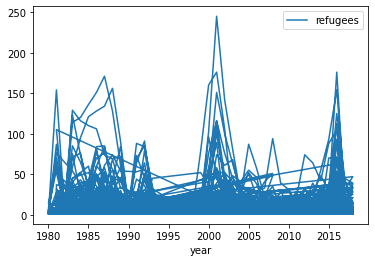

In [217]:
df1[df1['citizenship_stable'] == 'afghanistan'].plot(x='year', y='refugees')

<AxesSubplot:xlabel='year'>

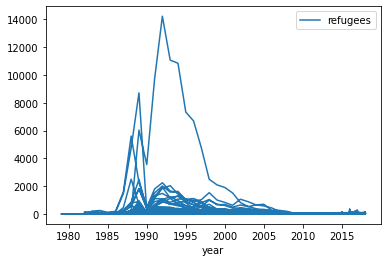

In [218]:
df1[df1['citizenship_stable'] == 'ussr'].plot(x='year', y='refugees')

<AxesSubplot:xlabel='year'>

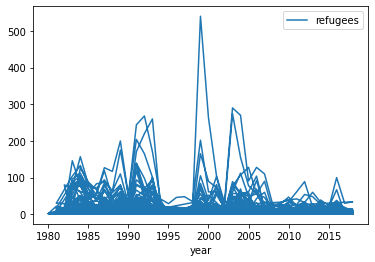

In [228]:
df1[df1['citizenship_stable'] == 'ethiopia'].plot(x='year', y='refugees')

### DataWrapper charts with annotations `2 points`

Using [DataWrapper](https://www.datawrapper.de/), make a line chart of one of the countries' refugees inflow over the years. **Use the annotation tool to note event(s) that caused an influx of refugees.**

Link the chart in the cell below.

In [262]:
df1[df1['citizenship_stable'] == 'afghanistan'].groupby('year').refugees.sum().to_csv('from_afghanistan.csv')

https://www.datawrapper.de/_/1pxJH/

### What are the top seven states for refugee resettlement in the USA? `1 point`

Trying to use a CSV of FIPS codes and state names never works out well, I recommend doing cleaning that up manually.

In [259]:
df1.groupby('state_fips').refugees.sum().sort_values(ascending = False).head(7)

state_fips
06   654,055.00
36   297,933.00
48   218,365.00
53   141,957.00
12   126,448.00
17   121,791.00
42   108,461.00
Name: refugees, dtype: float32

06 = California
36 = New York
48 = Texas
53 = Washington
12 = Florida
17 = Illinois
42 = Pensylvania

### Mapping refugees, level 1 `2 point`

Make a state-based choropleth of where refugees from a given country (your choice) have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

In [264]:
df1[df1['citizenship_stable'] == 'afghanistan'].reset_index().to_csv('from_afghanistan2.csv')

https://www.datawrapper.de/_/2BFP6/

### Mapping refugees, level 2 `3 points`

Make an animated map or a grid of maps of where refugees from a given country have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

> **Tip:** Depending on the tool you use, you might want either long or wide data. Using `.reset_index()` will give you long data, `.unstack()` will give you wide data.

https://www.datawrapper.de/_/zV7jD/